In [1]:
#pip install nltk 
#pip install spacy
#pip install requests beautifulsoup4
# pip install textblob
# pip install wordcloud


In [6]:
import requests
from bs4 import BeautifulSoup

class WahlprogrammeScraper:
    def __init__(self, base_url):
        self.base_url = base_url
        self.session = requests.Session()

    def get_html(self, url):
        """Holt den HTML-Quelltext einer gegebenen URL."""
        response = self.session.get(url)
        if response.status_code == 200:
            return response.text
        else:
            print(f"Fehler beim Abruf der Seite: {url}")
            return None

    def extract_party_links(self):
        """Generiert die Links zu den Wahlprogrammen der Parteien."""
        parties = ["spd", "bsw", "gruene", "afd", "die-linke", "fdp"]  
        links = [f"{self.base_url}/wahlprogramm-{party}" for party in parties]
        return links

    def extract_text_from_page(self, url):
        """Extrahiert den sichtbaren Text von einer Partei-Wahlprogrammseite."""
        html = self.get_html(url)
        if not html:
            return ""
        
        soup = BeautifulSoup(html, 'html.parser')
        paragraphs = soup.find_all('p') 
        text = '\n'.join([p.get_text() for p in paragraphs])
        
        return text

    def scrape_all_programs(self):
        """Sammelt Wahlprogramme aller Parteien von der Hauptseite."""
        party_links = self.extract_party_links()
        programmes = {}
        
        for link in party_links:
            print(f"Verarbeite: {link}")
            text = self.extract_text_from_page(link)
            programmes[link] = text
        
        return programmes


In [7]:
if __name__ == "__main__":
    url = "https://www.bundestagswahl-bw.de"
    scraper = WahlprogrammeScraper(url)
    programmes = scraper.scrape_all_programs()
    
    for link, content in programmes.items():
        print(f"Inhalt von {link}:")
        print(content[:500], "...\n") 

Verarbeite: https://www.bundestagswahl-bw.de/wahlprogramm-spd
Verarbeite: https://www.bundestagswahl-bw.de/wahlprogramm-bsw
Verarbeite: https://www.bundestagswahl-bw.de/wahlprogramm-gruene
Verarbeite: https://www.bundestagswahl-bw.de/wahlprogramm-afd
Verarbeite: https://www.bundestagswahl-bw.de/wahlprogramm-die-linke
Verarbeite: https://www.bundestagswahl-bw.de/wahlprogramm-fdp
Inhalt von https://www.bundestagswahl-bw.de/wahlprogramm-spd:
Welche Positionen vertritt die SPD 2025 in verschiedenen Politikfeldern wie z.B. Wirtschaft, Arbeit & Soziales, Migration & Integration, Umwelt & Klima oder der Außen- und Sicherheitspolitik?
Darüber hat die SPD am 11. Januar 2025 in Berlin entschieden – da hat die Partei in Berlin ihr Wahlprogramm beschlossen und Olaf Scholz als Kanzlerkandidat nominiert. Ein Entwurf des Wahlprogramms, das die SPD „Regierungsprogramm“ nennt, lag zuvor bereits vor. Er wurde allerdings bei der Verabschiedung noch ...

Inhalt von https://www.bundestagswahl-bw.de/wahlpro

In [11]:
from textblob import TextBlob

for party, text in programmes.items():
    analysis = TextBlob(text)
    print(f"Stimmung für {party}: {analysis.sentiment}")


Stimmung für https://www.bundestagswahl-bw.de/wahlprogramm-spd: Sentiment(polarity=0.1303030303030303, subjectivity=0.30606060606060603)
Stimmung für https://www.bundestagswahl-bw.de/wahlprogramm-bsw: Sentiment(polarity=-0.12222222222222223, subjectivity=0.4222222222222222)
Stimmung für https://www.bundestagswahl-bw.de/wahlprogramm-gruene: Sentiment(polarity=0.03333333333333333, subjectivity=0.06666666666666667)
Stimmung für https://www.bundestagswahl-bw.de/wahlprogramm-afd: Sentiment(polarity=0.03333333333333333, subjectivity=0.06666666666666667)
Stimmung für https://www.bundestagswahl-bw.de/wahlprogramm-die-linke: Sentiment(polarity=0.03333333333333333, subjectivity=0.06666666666666667)
Stimmung für https://www.bundestagswahl-bw.de/wahlprogramm-fdp: Sentiment(polarity=0.016666666666666666, subjectivity=0.03333333333333333)


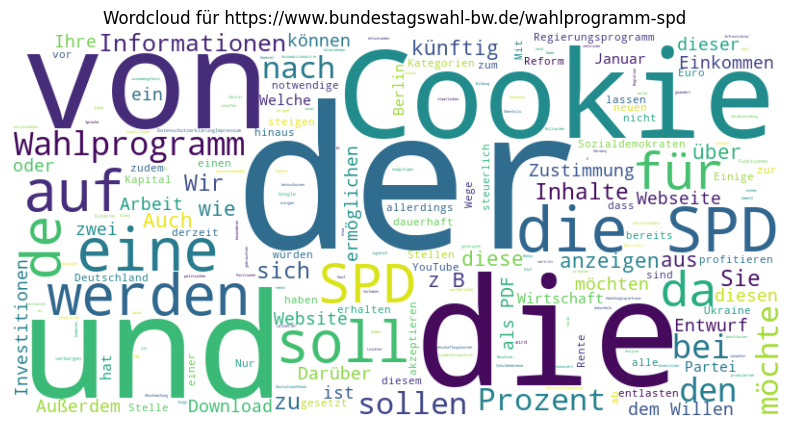

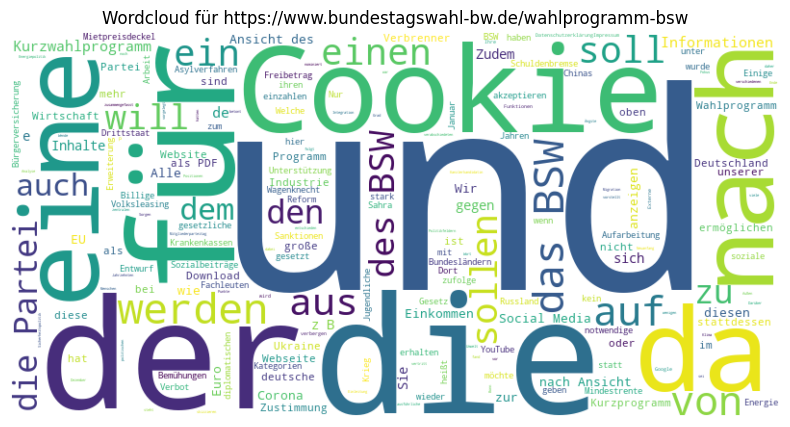

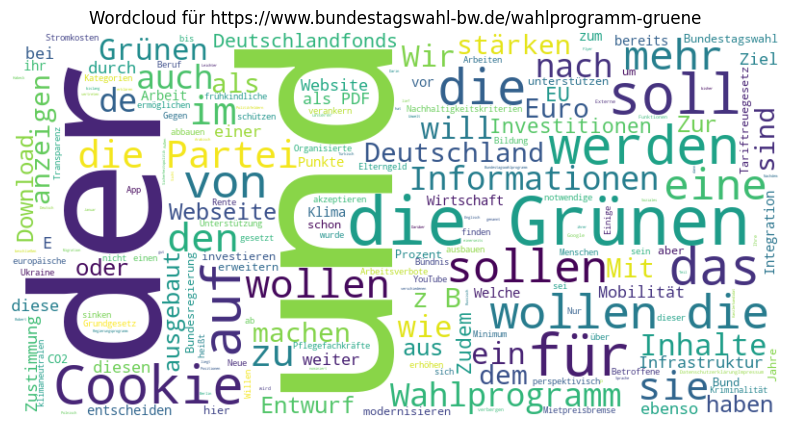

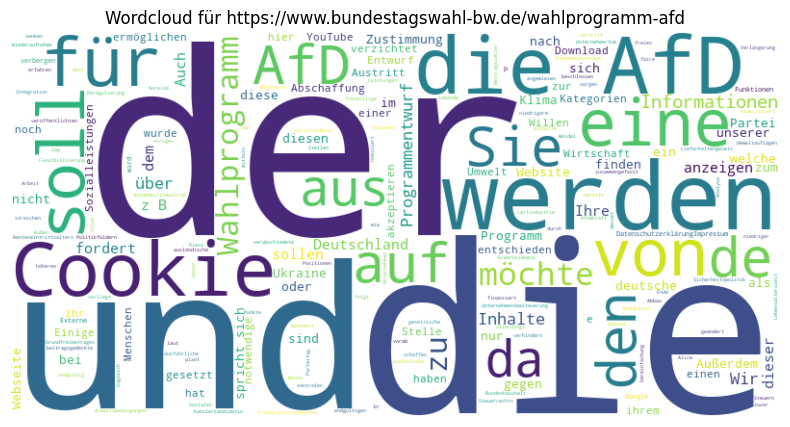

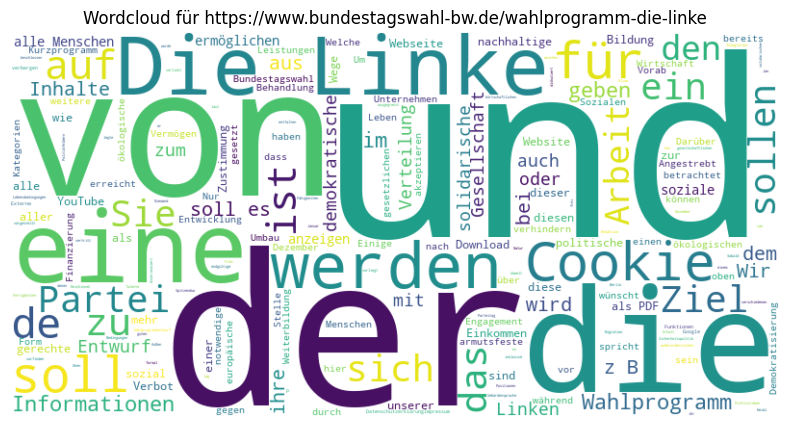

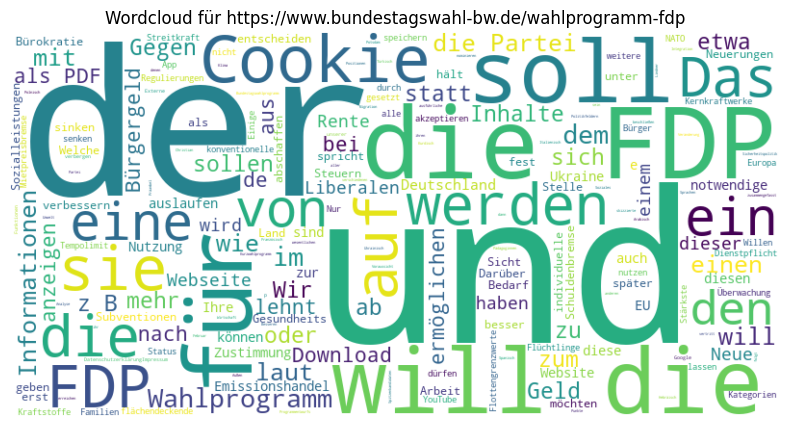

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Wordcloud für eine Partei
for party, text in programmes.items():
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud für {party}")
    plt.show()
